In [ ]:
import fastfusion
from fastfusion.mapper import Metrics
import time

import csv

from IPython.display import display, SVG

from paths import DATA_DIR

def run_experiment(arch_fname, workload_fname):
    spec = fastfusion.Specification.from_yaml(
        arch_fname,
        workload_fname,
    )
    spec.mapper.ffm.metrics = Metrics.ENERGY | Metrics.LATENCY
    start = time.time()
    pmappings = fastfusion.mapper.FFM.make_pmappings(spec)
    mappings = fastfusion.mapper.FFM.join_pmappings(spec, pmappings)
    end = time.time()
    duration = end - start
    return pmappings, mappings, duration

def write_output(fname, pmappings, duration, mappings):
    with open(DATA_DIR / fname, "w") as csvfile:
        writer = csv.writer(csvfile)
        row = mappings.data.iloc[0]
        energy = row["Total<SEP>energy"]
        latency = row["Total<SEP>latency"]
        writer.writerow(["evaluations", "mapper_time", "energy", "latency", "edp"])
        writer.writerow([pmappings.evaluated_pmappings(), duration, energy, latency, energy*latency])

In [ ]:
pmappings, mappings, duration = run_experiment(
    "architectures/fastfusion/tpu_like.yaml",
    "workloads/fastfusion/gemm_16k.yaml",
)
print(f"Mapper time: {duration:.2}")

In [2]:
print(pmappings.total_pmappings())
print(pmappings.evaluated_pmappings())
print(pmappings.valid_pmappings())
print(pmappings.pareto_optimal_pmappings())

1119675746.9564307
43282
32695.10678504107
66


In [3]:
chosen_mapping = mappings.data.iloc[0]['Total<SEP>mapping']

In [4]:
mappings.data

,Total<SEP>latency,Total<SEP>energy,Matmul<SEP>stride0,Matmul<SEP>stride1,Matmul<SEP>stride2,Matmul<SEP>stride3,Matmul<SEP>stride4,Matmul<SEP>latency<SEP>compute,Matmul<SEP>latency<SEP>Register,Matmul<SEP>latency<SEP>LocalBuffer,...,Matmul<SEP>energy<SEP>MainMemory<SEP>write,Matmul<SEP>energy<SEP>MAC<SEP>compute,Matmul<SEP>energy<SEP>MainMemory<SEP>leak,Matmul<SEP>energy<SEP>GlobalBuffer<SEP>leak,Matmul<SEP>energy<SEP>LocalBuffer<SEP>leak,Matmul<SEP>energy<SEP>scalar_unit<SEP>leak,Matmul<SEP>energy<SEP>Register<SEP>leak,Matmul<SEP>energy<SEP>MAC<SEP>leak,Matmul<SEP>mapping,Total<SEP>mapping
0,0.067109,1.033176,1024,1024,128,256,128,0.067109,0,0.009437,...,0.015097,0.307863,0,0,0,0,0,0,"type=None nodes=[Storage(type=None, tensors=['...",<fastfusion.mapper.FFM._interface.main.Mapping...


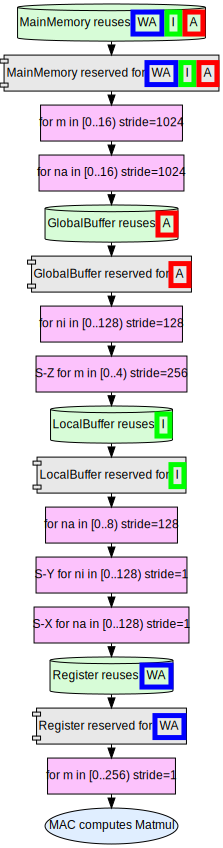

In [ ]:

display(SVG(chosen_mapping.render()))

In [ ]:
write_output("ffm_gemm_16k.csv", pmappings, duration, mappings)

In [ ]:
pmappings, mappings, duration = run_experiment(
    "architectures/fastfusion/tpu_like.yaml",
    "workloads/fastfusion/mha.yaml",
)
print(f"Mapper time: {duration:.2}")
write_output("ffm_mha.csv", pmappings, duration, mappings)

WARNING Loading configuration file from /home/gilbertm/work/venv/fastfusion/config.yaml
Generating pmapping templates for compute scalar_unit Einsum QK: 0it [00:00, ?it/s]
Generating pmapping templates for compute MAC Einsum QK: 55it [00:00, 85.40it/s]
Generating jobs: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]
WARNING Einsum QK has 55 pmapping templates:
WARNING 	[QK,Q,K in MainMemory] T-b,e,h,p initial=symbol stride=symbol S-Z-m initial=symbol stride=symbol S-Y-e initial=symbol stride=symbol S-X-p initial=symbol stride=symbol [K in Register] T-m initial=symbol stride=symbol MAC computes QK
WARNING 	[QK,Q,K in MainMemory] T-b,e,h,m initial=symbol stride=symbol S-Z-m initial=symbol stride=symbol [Q in LocalBuffer] T-p initial=symbol stride=symbol S-Y-e initial=symbol stride=symbol S-X-p initial=symbol stride=symbol [K in Register] T-m initial=symbol stride=symbol MAC computes QK
WARNING 	[QK,Q,K in MainMemory] T-b,h,m,p initial=symbol stride=symbol S-Z-m initial=symbol stride=symbol

In [20]:
mappings.data

def select_keyword(df, keyword):
    cols = []
    for col in df.columns:
        if keyword in col:
            cols.append(col)
    return df[cols]

df = select_keyword(mappings.data, "energy")
df

,Total<SEP>energy,QK<SEP>energy<SEP>Register<SEP>read,QK<SEP>energy<SEP>Register<SEP>write,QK<SEP>energy<SEP>LocalBuffer<SEP>read,QK<SEP>energy<SEP>LocalBuffer<SEP>write,QK<SEP>energy<SEP>GlobalBuffer<SEP>read,QK<SEP>energy<SEP>GlobalBuffer<SEP>write,QK<SEP>energy<SEP>MainMemory<SEP>read,QK<SEP>energy<SEP>MainMemory<SEP>write,QK<SEP>energy<SEP>MAC<SEP>compute,QK<SEP>energy<SEP>MainMemory<SEP>leak,QK<SEP>energy<SEP>GlobalBuffer<SEP>leak,QK<SEP>energy<SEP>LocalBuffer<SEP>leak,QK<SEP>energy<SEP>scalar_unit<SEP>leak,QK<SEP>energy<SEP>Register<SEP>leak,QK<SEP>energy<SEP>MAC<SEP>leak
0,9.433123,0,0,0.274878,0.004982,0.00859,0.002491,0.181162,7.729567,1.231453,0,0,0,0,0,0


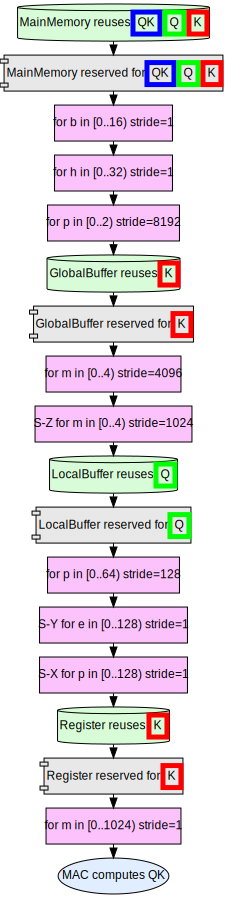

In [21]:
display(SVG(mappings.data.iloc[0]["Total<SEP>mapping"].render()))